In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
plt.style.use('fivethirtyeight')
params = {'legend.fontsize': 'medium',
          'figure.figsize': (8, 5),
         'axes.labelsize': 'medium',
         'axes.titlesize':'medium',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small',
         'lines.linewidth' : 1.5}
plt.rcParams.update(params)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_global = pd.read_csv('Global_mobility_Report.csv')
df_global_new = pd.read_csv('Global_mobility_Report_new.csv')
df_us = pd.read_csv('us.csv')

In [3]:
us = df_global[(df_global['country_region'] == 'United States') & (df_global['sub_region_1'].isna()) ]
us_new = df_global_new[(df_global_new['country_region'] == 'United States') & (df_global_new['sub_region_1'].isna()) ]

In [4]:
us_new.shape

(220, 14)

In [5]:
us.shape

(210, 14)

#### Dropping unwanted columns

In [6]:
us = us.drop(['country_region_code', 'country_region', 'sub_region_1', 
                   'sub_region_2', 'metro_area', 'iso_3166_2_code', 'census_fips_code'], axis = 1)
df_us = df_us.drop(['deaths'], axis = 1)

In [7]:
us_new = us_new.drop(['country_region_code', 'country_region', 'sub_region_1', 
                   'sub_region_2', 'metro_area', 'iso_3166_2_code', 'census_fips_code'], axis = 1)

#### Changing date format to pandas datetime

In [8]:
us['date'] = pd.to_datetime(us['date'])
us_new['date'] = pd.to_datetime(us_new['date'])
df_us['date'] = pd.to_datetime(df_us['date'])

In [9]:
us.set_index('date', inplace = True)
us_new.set_index('date', inplace = True)
df_us.set_index('date', inplace = True)

In [10]:
df_us['case_day'] = df_us['cases'].diff()
df_us['case_day'][0] = 1
df_us['case_day'] =  df_us['case_day'].astype('int')

### Merging both datasets to one

#### using fillna to fill all nan values in new dataset with old dataset

In [11]:
us = us_new.fillna(us)

#### Filling rest nan values with value from last week's same day

In [12]:
us['retail_and_recreation_percent_change_from_baseline'].fillna(us['retail_and_recreation_percent_change_from_baseline'].shift(7), inplace = True)
us['retail_and_recreation_percent_change_from_baseline'].fillna(us['retail_and_recreation_percent_change_from_baseline'].shift(7), inplace = True)
us['grocery_and_pharmacy_percent_change_from_baseline'].fillna(us['grocery_and_pharmacy_percent_change_from_baseline'].shift(7), inplace = True)
us['grocery_and_pharmacy_percent_change_from_baseline'].fillna(us['grocery_and_pharmacy_percent_change_from_baseline'].shift(7), inplace = True)
us['parks_percent_change_from_baseline'].fillna(us['parks_percent_change_from_baseline'].shift(7), inplace = True)
us['parks_percent_change_from_baseline'].fillna(us['parks_percent_change_from_baseline'].shift(7), inplace = True)
us['transit_stations_percent_change_from_baseline'].fillna(us['transit_stations_percent_change_from_baseline'].shift(7), inplace = True)
us['transit_stations_percent_change_from_baseline'].fillna(us['transit_stations_percent_change_from_baseline'].shift(7), inplace = True)

In [13]:
us.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 220 entries, 2020-02-15 to 2020-09-21
Data columns (total 6 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   retail_and_recreation_percent_change_from_baseline  220 non-null    float64
 1   grocery_and_pharmacy_percent_change_from_baseline   220 non-null    float64
 2   parks_percent_change_from_baseline                  220 non-null    float64
 3   transit_stations_percent_change_from_baseline       220 non-null    float64
 4   workplaces_percent_change_from_baseline             220 non-null    float64
 5   residential_percent_change_from_baseline            220 non-null    float64
dtypes: float64(6)
memory usage: 22.0 KB


In [14]:
us.shape

(220, 6)

In [15]:
df_us.tail()

,cases,case_day
date,,
2020-09-16,6653328,39216
2020-09-17,6698641,45313
2020-09-18,6747516,48875
2020-09-19,6789360,41844
2020-09-20,6825761,36401


In [16]:
df = df_us.join(us, how='inner')

In [17]:
df.shape

(219, 8)

In [18]:
df.head()

,cases,case_day,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,
2020-02-15,15,0,6.0,2.0,15.0,3.0,2.0,-1.0
2020-02-16,15,0,7.0,1.0,16.0,2.0,0.0,-1.0
2020-02-17,25,10,6.0,0.0,28.0,-9.0,-24.0,5.0
2020-02-18,25,0,0.0,-1.0,6.0,1.0,0.0,1.0
2020-02-19,25,0,2.0,0.0,8.0,1.0,1.0,0.0


### Renaming columns

In [19]:
col = {'retail_and_recreation_percent_change_from_baseline': 'retail', 
      'grocery_and_pharmacy_percent_change_from_baseline': 'grocery',
      'parks_percent_change_from_baseline': 'parks',
      'transit_stations_percent_change_from_baseline': 'transit',
      'workplaces_percent_change_from_baseline' : 'workplace',
      'residential_percent_change_from_baseline': 'residential'}

In [20]:
df.rename(columns = col, inplace = True)

In [21]:
df.head()

,cases,case_day,retail,grocery,parks,transit,workplace,residential
date,,,,,,,,
2020-02-15,15,0,6.0,2.0,15.0,3.0,2.0,-1.0
2020-02-16,15,0,7.0,1.0,16.0,2.0,0.0,-1.0
2020-02-17,25,10,6.0,0.0,28.0,-9.0,-24.0,5.0
2020-02-18,25,0,0.0,-1.0,6.0,1.0,0.0,1.0
2020-02-19,25,0,2.0,0.0,8.0,1.0,1.0,0.0


In [22]:
df.tail()

,cases,case_day,retail,grocery,parks,transit,workplace,residential
date,,,,,,,,
2020-09-16,6653328,39216,-10.0,-3.0,58.0,-32.0,-34.0,9.0
2020-09-17,6698641,45313,-11.0,-2.0,61.0,-32.0,-34.0,9.0
2020-09-18,6747516,48875,-12.0,-5.0,69.0,-30.0,-33.0,8.0
2020-09-19,6789360,41844,-12.0,3.0,108.0,-21.0,-13.0,2.0
2020-09-20,6825761,36401,-9.0,0.0,106.0,-24.0,-15.0,2.0


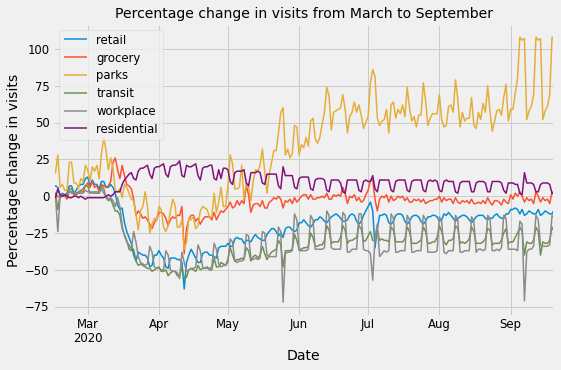

In [23]:
df[['retail', 'grocery', 'parks', 'transit', 'workplace', 'residential']].plot()
plt.xlabel('Date')
plt.ylabel('Percentage change in visits')
plt.title('Percentage change in visits from March to September')
plt.legend(fontsize = 'small')
plt.show()

Helper function to reduce the number of x_ticks

### Train Test Split

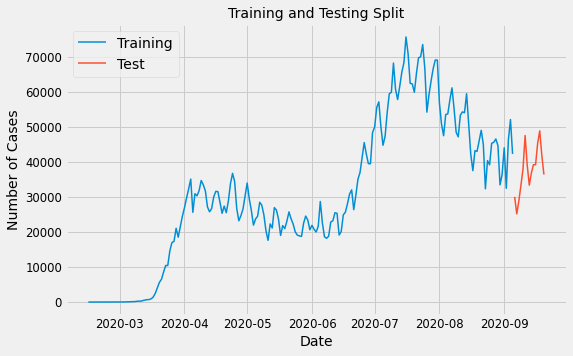

In [24]:
train = df.loc['2020-02-15':'2020-09-05']
test = df.loc['2020-09-06':]
fig, ax = plt.subplots()
plt.plot(train['case_day'], label = 'Training')
plt.plot(test['case_day'], label = 'Test')
plt.legend(loc = 'upper left')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('Training and Testing Split')
plt.show()

### Grid search to look for best parameters since the dataset reduced because of mobility data

##### Grid search take a long time to run so I have changed the cells to raw so I don't run it again by mistake

In [25]:
scores = {}

In [26]:
scores['Baseline'] = 8056

### ARIMAX model with Workplace percent as exogenous

In [27]:
workplace = SARIMAX(train['case_day'], 
                  exog = train['workplace'] , 
                  order=(7, 1, 6))
workplace_fit = workplace.fit(disp=False)

In [28]:
workplace_preds = workplace_fit.forecast(steps = 15, exog = test['workplace'])

In [29]:
workplace_preds

2020-09-06    36904.722585
2020-09-07    41350.586590
2020-09-08    39570.847898
2020-09-09    39297.268050
2020-09-10    45786.035042
2020-09-11    49864.031631
2020-09-12    42768.850272
2020-09-13    36481.043267
2020-09-14    38569.816507
2020-09-15    38663.764477
2020-09-16    39185.902790
2020-09-17    45162.024996
2020-09-18    49750.719290
2020-09-19    42482.592981
2020-09-20    37040.285019
Freq: D, dtype: float64

In [30]:
workplace_rmse = np.sqrt(mean_squared_error(workplace_preds, test['case_day']))
print('Workplace RMSE: ', workplace_rmse)
scores['Workplace'] = workplace_rmse

Workplace RMSE:  6069.336353398493


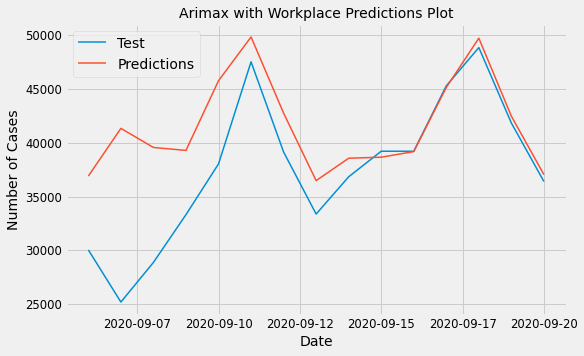

In [31]:
fig, ax = plt.subplots()
plt.plot(test['case_day'], label = 'Test')
plt.plot(workplace_preds, label  = 'Predictions')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(loc = 'upper left')
plt.title('Arimax with Workplace Predictions Plot')
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
plt.show()

### ARIMAX model with Residential percent as exogenous

In [32]:
residential = SARIMAX(train['case_day'], 
                  exog = train['residential'] , 
                  order=(7, 1, 6))
residential_fit = residential.fit(disp=False)

In [33]:
residential_preds = residential_fit.forecast(steps = 15, exog = test['residential'])

In [34]:
residential_preds

2020-09-06    36014.817334
2020-09-07    41705.879371
2020-09-08    39576.572739
2020-09-09    40135.764849
2020-09-10    46396.067862
2020-09-11    50903.807808
2020-09-12    43001.934440
2020-09-13    37504.590976
2020-09-14    39469.649517
2020-09-15    39978.514497
2020-09-16    39853.165366
2020-09-17    46899.137162
2020-09-18    50448.421970
2020-09-19    43071.271663
2020-09-20    37471.974941
Freq: D, dtype: float64

In [35]:
residential_rmse = np.sqrt(mean_squared_error(residential_preds, test['case_day']))
print('Residential RMSE: ', residential_rmse)
scores['Residential'] = residential_rmse

Residential RMSE:  6319.855834574307


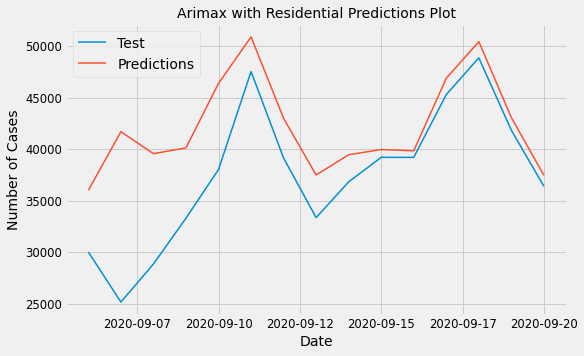

In [36]:
fig, ax = plt.subplots()
plt.plot(test['case_day'], label = 'Test')
plt.plot(residential_preds, label  = 'Predictions')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(loc = 'upper left')
plt.title('Arimax with Residential Predictions Plot')
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
plt.show()

### ARIMAX model with Parks percent as exogenous

In [37]:
parks = SARIMAX(train['case_day'], 
                  exog = train['parks'] , 
                  order=(7, 1, 6))
parks_fit = parks.fit(disp=False)

In [38]:
parks_preds = parks_fit.forecast(steps = 15, exog = test['parks'])

In [39]:
parks_preds

2020-09-06    37025.554757
2020-09-07    37876.206135
2020-09-08    39939.759147
2020-09-09    39705.451889
2020-09-10    46157.771579
2020-09-11    50235.143590
2020-09-12    43730.364305
2020-09-13    37128.282702
2020-09-14    38756.215094
2020-09-15    39842.612064
2020-09-16    39925.573148
2020-09-17    45997.386415
2020-09-18    50298.005186
2020-09-19    43940.194309
2020-09-20    37798.982672
Freq: D, dtype: float64

In [40]:
parks_rmse = np.sqrt(mean_squared_error(parks_preds, test['case_day']))
print('Parks RMSE: ', parks_rmse)
scores['Parks'] = parks_rmse

Parks RMSE:  5747.796434988859


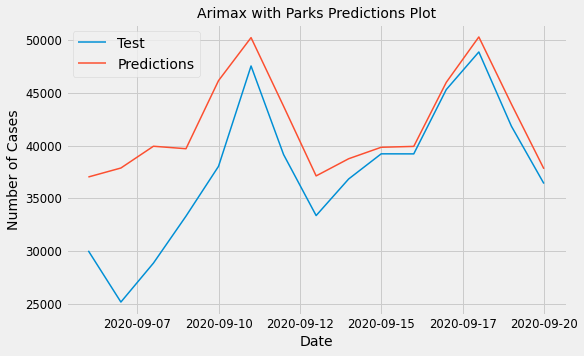

In [41]:
fig, ax = plt.subplots()
plt.plot(test['case_day'], label = 'Test')
plt.plot(parks_preds, label  = 'Predictions')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(loc = 'upper left')
plt.title('Arimax with Parks Predictions Plot')
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
plt.show()

### ARIMAX model with Transit percent as exogenous

In [42]:
transit = SARIMAX(train['case_day'], 
                  exog = train['transit'] , 
                  order=(7, 1, 6))
transit_fit = transit.fit(disp=False)

In [43]:
transit_preds = transit_fit.forecast(steps = 15, exog = test['parks'])

In [44]:
transit_preds

2020-09-06    23683.493735
2020-09-07    23820.532911
2020-09-08    31034.877205
2020-09-09    30575.903085
2020-09-10    36922.842729
2020-09-11    40259.124970
2020-09-12    30178.110003
2020-09-13    23787.913073
2020-09-14    24573.612913
2020-09-15    30846.440784
2020-09-16    30723.439504
2020-09-17    36743.832579
2020-09-18    40332.604387
2020-09-19    30335.493094
2020-09-20    24442.590103
Freq: D, dtype: float64

In [45]:
transit_rmse = np.sqrt(mean_squared_error(transit_preds, test['case_day']))
print('Transit RMSE: ', transit_rmse)
scores['Transit'] = transit_rmse

Transit RMSE:  8146.580577042953


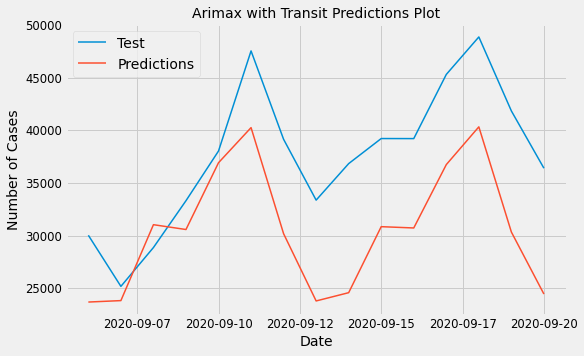

In [46]:
fig, ax = plt.subplots()
plt.plot(test['case_day'], label = 'Test')
plt.plot(transit_preds, label  = 'Predictions')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(loc = 'upper left')
plt.title('Arimax with Transit Predictions Plot')
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
plt.show()

### ARIMAX model with Grocery percent as exogneous

In [47]:
grocery = SARIMAX(train['case_day'], 
                  exog = train['grocery'] , 
                  order=(7, 1, 6))
grocery_fit = grocery.fit(disp=False)

In [48]:
grocery_preds = grocery_fit.forecast(steps = 15, exog = test['grocery'])

In [49]:
grocery_preds

2020-09-06    36362.135951
2020-09-07    37746.243810
2020-09-08    39001.003372
2020-09-09    38505.428892
2020-09-10    45330.013847
2020-09-11    48975.866506
2020-09-12    43030.734273
2020-09-13    36707.990241
2020-09-14    37913.703465
2020-09-15    38809.048019
2020-09-16    38279.291482
2020-09-17    45067.573052
2020-09-18    48460.436534
2020-09-19    43190.888767
2020-09-20    37177.864150
Freq: D, dtype: float64

In [50]:
grocery_rmse = np.sqrt(mean_squared_error(grocery_preds, test['case_day']))
print('Grocery RMSE: ', grocery_rmse)
scores['Grocery'] = grocery_rmse

Grocery RMSE:  5254.918696795082


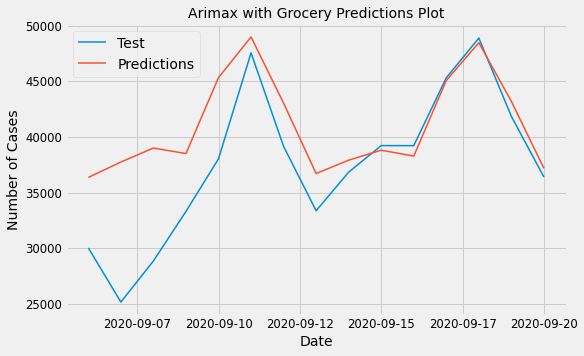

In [51]:
fig, ax = plt.subplots()
plt.plot(test['case_day'], label = 'Test')
plt.plot(grocery_preds, label  = 'Predictions')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(loc = 'upper left')
plt.title('Arimax with Grocery Predictions Plot')
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
plt.show()

### ARIMAX model with Retail percent as exogenous

In [52]:
retail = SARIMAX(train['case_day'], 
                  exog = train['retail'] , 
                  order=(7, 1, 6))
retail_fit = retail.fit(disp=False)

In [53]:
retail_preds = retail_fit.forecast(steps = 15, exog = test['retail'])

In [54]:
retail_preds

2020-09-06    36689.530427
2020-09-07    38133.451782
2020-09-08    39434.359505
2020-09-09    39420.497499
2020-09-10    45948.039903
2020-09-11    50172.129670
2020-09-12    43198.502845
2020-09-13    37166.226687
2020-09-14    38681.887943
2020-09-15    39450.956824
2020-09-16    39480.239437
2020-09-17    45915.647136
2020-09-18    49957.611692
2020-09-19    43406.272940
2020-09-20    37789.978404
Freq: D, dtype: float64

In [55]:
retail_rmse = np.sqrt(mean_squared_error(retail_preds, test['case_day']))
print('Retail RMSE: ', retail_rmse)
scores['Retail'] = retail_rmse

Retail RMSE:  5604.073788652605


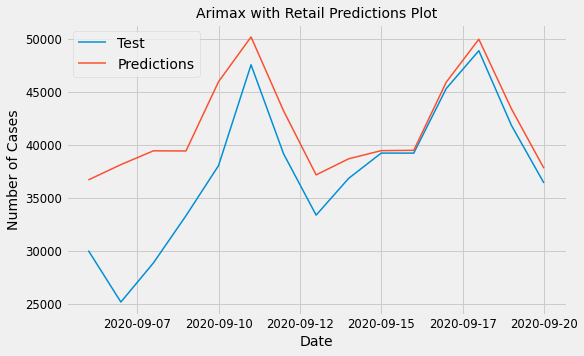

In [56]:
fig, ax = plt.subplots()
plt.plot(test['case_day'], label = 'Test')
plt.plot(retail_preds, label  = 'Predictions')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(loc = 'upper left')
plt.title('Arimax with Retail Predictions Plot')
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
plt.show()

## Using Mask mandatory policy data

In [57]:
df_mask = pd.read_pickle('mand_mask.pkl')

In [58]:
df_mask.head()

,num
date,
2020-05-11,1
2020-05-06,2
2020-04-15,3
2020-05-01,4
2020-04-23,5


In [59]:
df = df.join(df_mask, how = 'outer')

In [60]:
df['num'].fillna(method = 'ffill', inplace = True)

In [61]:
df['num'].fillna(0, inplace = True)

In [62]:
df.rename(columns = {'num': 'states_with_mask'}, inplace = True)

In [63]:
df.head()

,cases,case_day,retail,grocery,parks,transit,workplace,residential,states_with_mask
date,,,,,,,,,
2020-02-15,15,0,6.0,2.0,15.0,3.0,2.0,-1.0,0.0
2020-02-16,15,0,7.0,1.0,16.0,2.0,0.0,-1.0,0.0
2020-02-17,25,10,6.0,0.0,28.0,-9.0,-24.0,5.0,0.0
2020-02-18,25,0,0.0,-1.0,6.0,1.0,0.0,1.0,0.0
2020-02-19,25,0,2.0,0.0,8.0,1.0,1.0,0.0,0.0


<AxesSubplot:xlabel='date'>

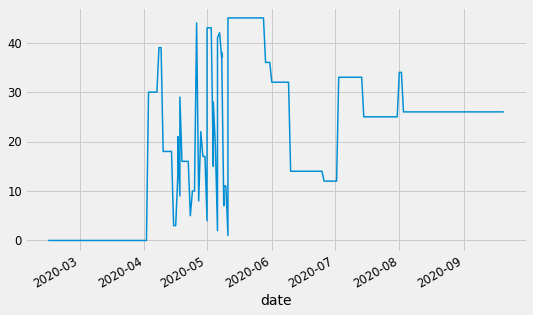

In [64]:
df.states_with_mask.plot()

In [65]:
train = df.loc['2020-02-15':'2020-09-05']
test = df.loc['2020-09-06':]

In [66]:
mask = SARIMAX(train['case_day'], 
                  exog = train['states_with_mask'] , 
                  order=(7, 1, 6))
mask_fit = mask.fit(disp=False)

In [67]:
mask_preds = mask_fit.forecast(steps = 15, exog = test['states_with_mask'], index = test.index)

In [68]:
mask_preds

date
2020-09-06    36463.062299
2020-09-07    38591.648709
2020-09-08    39899.866022
2020-09-09    39593.005377
2020-09-10    45145.795192
2020-09-11    49344.089406
2020-09-12    42562.649048
2020-09-13    36577.624629
2020-09-14    38489.662034
2020-09-15    39785.024443
2020-09-16    39225.171618
2020-09-17    44975.622790
2020-09-18    48729.446720
2020-09-19    42561.646328
2020-09-20    36653.249951
dtype: float64

In [69]:
mask_rmse = np.sqrt(mean_squared_error(mask_preds, test['case_day']))
print('Mask RMSE: ', mask_rmse)
scores['Masks'] = mask_rmse

Mask RMSE:  5550.694701343534


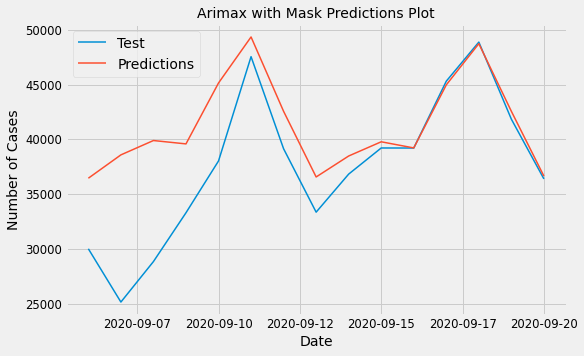

In [70]:
fig, ax = plt.subplots()
plt.plot(test['case_day'], label = 'Test')
plt.plot(mask_preds, label  = 'Predictions')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(loc = 'upper left')
plt.title('Arimax with Mask Predictions Plot')
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
plt.show()

## Using Shelter in Place data

In [71]:
df_shelter = pd.read_pickle('shelter.pkl')

In [72]:
df_shelter.head()

,num
date,
2020-03-15,1
2020-03-19,2
2020-03-20,3
2020-03-21,4
2020-03-21,5


In [73]:
df = df.join(df_shelter, how = 'outer')
df['num'].fillna(method = 'ffill', inplace = True)
df['num'].fillna(0, inplace = True)
df.rename(columns = {'num': 'states_with_shelter'}, inplace = True)

In [74]:
df.head()

,cases,case_day,retail,grocery,parks,transit,workplace,residential,states_with_mask,states_with_shelter
date,,,,,,,,,,
2020-02-15,15,0,6.0,2.0,15.0,3.0,2.0,-1.0,0.0,0.0
2020-02-16,15,0,7.0,1.0,16.0,2.0,0.0,-1.0,0.0,0.0
2020-02-17,25,10,6.0,0.0,28.0,-9.0,-24.0,5.0,0.0,0.0
2020-02-18,25,0,0.0,-1.0,6.0,1.0,0.0,1.0,0.0,0.0
2020-02-19,25,0,2.0,0.0,8.0,1.0,1.0,0.0,0.0,0.0


<AxesSubplot:xlabel='date'>

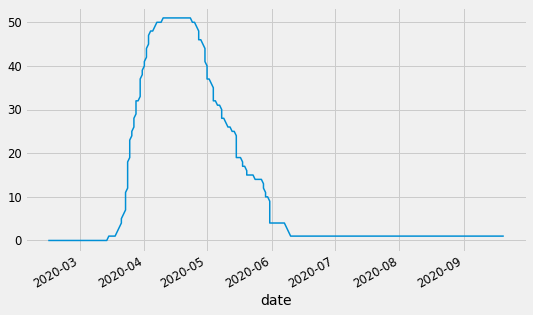

In [75]:
df.states_with_shelter.plot()

In [76]:
train = df.loc['2020-02-15':'2020-09-05']
test = df.loc['2020-09-06':]

In [77]:
shelter = SARIMAX(train['case_day'], 
                  exog = train['states_with_shelter'] , 
                  order=(7, 1, 6))
shelter_fit = shelter.fit(disp=False)

In [78]:
shelter_preds = shelter_fit.forecast(steps = 15, exog = test['states_with_shelter'], index = test.index)

In [79]:
shelter_preds

date
2020-09-06    36099.307121
2020-09-07    38979.562337
2020-09-08    39727.122366
2020-09-09    41634.322527
2020-09-10    45338.964943
2020-09-11    50062.059403
2020-09-12    42709.497836
2020-09-13    36845.071323
2020-09-14    37779.742815
2020-09-15    40957.231354
2020-09-16    40586.210819
2020-09-17    46204.285812
2020-09-18    49191.488104
2020-09-19    43525.366567
2020-09-20    36175.314972
dtype: float64

In [80]:
shelter_rmse = np.sqrt(mean_squared_error(shelter_preds, test['case_day']))
print('Shelter RMSE: ', shelter_rmse)
scores['Shelter'] = shelter_rmse

Shelter RMSE:  5823.360732949931


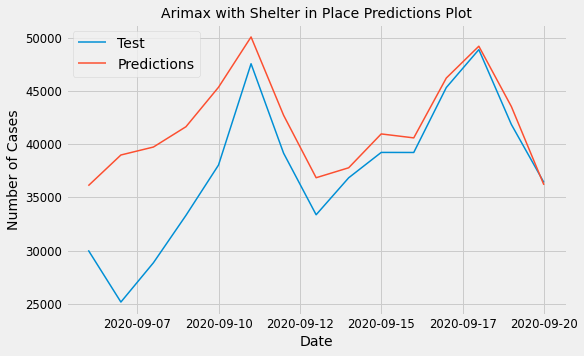

In [81]:
fig, ax = plt.subplots()
plt.plot(test['case_day'], label = 'Test')
plt.plot(shelter_preds, label  = 'Predictions')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(loc = 'upper left')
plt.title('Arimax with Shelter in Place Predictions Plot')
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
plt.show()

## Using Food and Drink Policy data

In [82]:
df_food = pd.read_pickle('food.pkl')

In [83]:
df_food.head()

,num
date,
2020-03-15,1
2020-03-16,2
2020-03-16,3
2020-03-16,4
2020-03-16,5


In [84]:
df = df.join(df_food, how = 'outer')
df['num'].fillna(method = 'ffill', inplace = True)
df['num'].fillna(0, inplace = True)
df.rename(columns = {'num': 'states_with_food_rest'}, inplace = True)

In [85]:
df.head()

,cases,case_day,retail,grocery,parks,transit,workplace,residential,states_with_mask,states_with_shelter,states_with_food_rest
date,,,,,,,,,,,
2020-02-15,15,0,6.0,2.0,15.0,3.0,2.0,-1.0,0.0,0.0,0.0
2020-02-16,15,0,7.0,1.0,16.0,2.0,0.0,-1.0,0.0,0.0,0.0
2020-02-17,25,10,6.0,0.0,28.0,-9.0,-24.0,5.0,0.0,0.0,0.0
2020-02-18,25,0,0.0,-1.0,6.0,1.0,0.0,1.0,0.0,0.0,0.0
2020-02-19,25,0,2.0,0.0,8.0,1.0,1.0,0.0,0.0,0.0,0.0


<AxesSubplot:xlabel='date'>

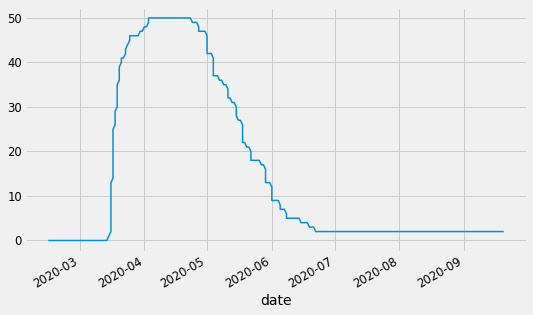

In [86]:
df.states_with_food_rest.plot()

In [87]:
train = df.loc['2020-02-15':'2020-09-05']
test = df.loc['2020-09-06':]

In [88]:
food = SARIMAX(train['case_day'], 
                  exog = train['states_with_food_rest'] , 
                  order=(7, 1, 6))
food_fit = food.fit(disp=False)

In [89]:
food_preds = food_fit.forecast(steps = 15, exog = test['states_with_food_rest'], index = test.index)

In [90]:
food_preds

date
2020-09-06    35566.636727
2020-09-07    38227.439300
2020-09-08    39706.589496
2020-09-09    41098.633444
2020-09-10    45470.148188
2020-09-11    49882.223461
2020-09-12    42967.292705
2020-09-13    36219.376137
2020-09-14    37296.166294
2020-09-15    40377.960971
2020-09-16    40538.452850
2020-09-17    45742.591602
2020-09-18    49447.443638
2020-09-19    43615.170515
2020-09-20    36004.351745
dtype: float64

In [91]:
food_rmse = np.sqrt(mean_squared_error(food_preds, test['case_day']))
print('Food RMSE: ', food_rmse)
scores['Food'] = food_rmse

Food RMSE:  5596.265333716432


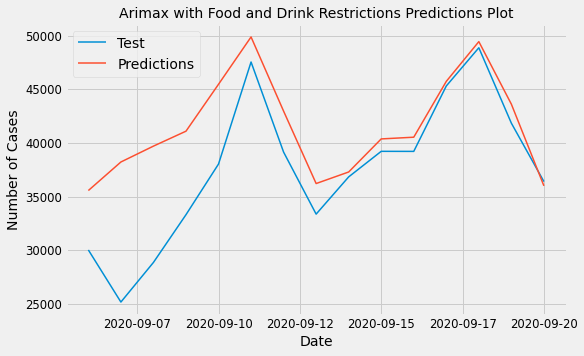

In [92]:
fig, ax = plt.subplots()
plt.plot(test['case_day'], label = 'Test')
plt.plot(food_preds, label  = 'Predictions')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(loc = 'upper left')
plt.title('Arimax with Food and Drink Restrictions Predictions Plot')
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
plt.show()

### Adding Multiple Exog(all)

In [93]:
exog = np.array(train[['retail', 'grocery', 'parks', 'transit', 'workplace',
                       'residential', 'states_with_mask', 'states_with_shelter', 'states_with_food_rest']])

In [94]:
test_exog = np.array(test[['retail', 'grocery', 'parks', 'transit', 'workplace',
                           'residential', 'states_with_mask', 'states_with_shelter', 'states_with_food_rest']])

In [95]:
exog.shape

(556, 9)

In [96]:
model = SARIMAX(train['case_day'], 
                  exog = exog , 
                  order=(7, 1, 6))
model_fit = model.fit()

In [97]:
model_preds = model_fit.forecast(steps = 15, exog = test_exog)

In [98]:
model_preds

556    36751.639861
557    42682.879109
558    38830.324803
559    41453.786706
560    44582.603369
561    46221.779019
562    44076.957338
563    36992.887078
564    30893.976902
565    39245.078302
566    39530.003025
567    44511.863664
568    45683.907330
569    44159.391363
570    36656.650560
dtype: float64

In [99]:
model_rmse = np.sqrt(mean_squared_error(model_preds, test['case_day']))
print('Model RMSE: ', model_rmse)
scores['All Exog'] = model_rmse

Model RMSE:  6588.395401388048


In [100]:
{k: v for k, v in sorted(scores.items(), key=lambda item: item[1])}

{'Grocery': 5254.918696795082,
 'Masks': 5550.694701343534,
 'Food': 5596.265333716432,
 'Retail': 5604.073788652605,
 'Parks': 5747.796434988859,
 'Shelter': 5823.360732949931,
 'Workplace': 6069.336353398493,
 'Residential': 6319.855834574307,
 'All Exog': 6588.395401388048,
 'Baseline': 8056,
 'Transit': 8146.580577042953}

### Using Top 5

In [101]:
exog2 = np.array(train[['retail', 'grocery', 'parks',
                        'states_with_mask', 'states_with_food_rest']])
test_exog2 = np.array(test[['retail', 'grocery', 'parks',
                        'states_with_mask', 'states_with_food_rest']])

In [102]:
top5 = SARIMAX(train['case_day'], 
                  exog = exog2 , 
                  order=(7, 1, 6))
top5_fit = top5.fit(disp = False)

In [103]:
top5_preds = top5_fit.forecast(steps = 15, exog = test_exog2, index = test.index)

In [104]:
top5_preds

date
2020-09-06    33995.331107
2020-09-07    36563.767790
2020-09-08    39570.865250
2020-09-09    41229.940344
2020-09-10    45752.972238
2020-09-11    49169.721296
2020-09-12    41712.457660
2020-09-13    35929.827676
2020-09-14    34789.716194
2020-09-15    40880.250440
2020-09-16    39967.079020
2020-09-17    46941.827331
2020-09-18    47691.636322
2020-09-19    43357.903919
2020-09-20    34760.514520
dtype: float64

In [105]:
top5_rmse = np.sqrt(mean_squared_error(top5_preds, test['case_day']))
print('top5 RMSE: ', top5_rmse)
scores['Top 5'] = top5_rmse

top5 RMSE:  5257.708405495688


In [106]:
{k: v for k, v in sorted(scores.items(), key=lambda item: item[1])}

{'Grocery': 5254.918696795082,
 'Top 5': 5257.708405495688,
 'Masks': 5550.694701343534,
 'Food': 5596.265333716432,
 'Retail': 5604.073788652605,
 'Parks': 5747.796434988859,
 'Shelter': 5823.360732949931,
 'Workplace': 6069.336353398493,
 'Residential': 6319.855834574307,
 'All Exog': 6588.395401388048,
 'Baseline': 8056,
 'Transit': 8146.580577042953}

### Using Top 4

In [119]:
exog3 = np.array(train[[ 'grocery', 'states_with_mask', 'retail', 'states_with_food_rest']])
test_exog3 = np.array(test[[ 'grocery', 'states_with_mask',  'retail', 'states_with_food_rest']])

In [120]:
top4 = SARIMAX(train['case_day'], 
                  exog = exog3 , 
                  order=(7, 1, 6))
top4_fit = top4.fit(disp = False)

In [121]:
top4_preds = top4_fit.forecast(steps = 15, exog = test_exog3, index = test.index)

In [122]:
top4_preds

date
2020-09-06    35003.914944
2020-09-07    37440.344518
2020-09-08    38272.038754
2020-09-09    39153.988495
2020-09-10    44964.118228
2020-09-11    48570.967616
2020-09-12    42193.140374
2020-09-13    36254.297283
2020-09-14    36596.930674
2020-09-15    38818.240629
2020-09-16    38372.051818
2020-09-17    45543.320914
2020-09-18    47690.347955
2020-09-19    43148.085384
2020-09-20    35934.623279
dtype: float64

In [123]:
top4_rmse = np.sqrt(mean_squared_error(top4_preds, test['case_day']))
print('top4 RMSE: ', top4_rmse)
scores['Top 4'] = top4_rmse

top4 RMSE:  4958.498310830674


In [113]:
{k: v for k, v in sorted(scores.items(), key=lambda item: item[1])}

{'Top 4': 4958.498310830674,
 'Grocery': 5254.918696795082,
 'Top 5': 5257.708405495688,
 'Masks': 5550.694701343534,
 'Food': 5596.265333716432,
 'Retail': 5604.073788652605,
 'Parks': 5747.796434988859,
 'Shelter': 5823.360732949931,
 'Workplace': 6069.336353398493,
 'Residential': 6319.855834574307,
 'All Exog': 6588.395401388048,
 'Baseline': 8056,
 'Transit': 8146.580577042953}

In [124]:
top4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               case_day   No. Observations:                  556
Model:               SARIMAX(7, 1, 6)   Log Likelihood               -4993.630
Date:                Mon, 28 Sep 2020   AIC                          10023.259
Time:                        15:28:13   BIC                          10101.001
Sample:                             0   HQIC                         10053.627
                                - 556                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           181.7361     31.547      5.761      0.000     119.906     243.566
x2             2.7857     13.518      0.206      0.837     -23.710      29.281
x3           -47.2427     45.635     -1.035      0.301    -136.686      42.200
x4             5.0641    201.899      0.025      0.980    -390.652     400.780
ar.L1         -0.0608      1.013     -0.060      0.952      -2.047       1.925
ar.L2         -0.6208      0.343     -1.812      0.070      -1.292       0.051
ar.L3         -0.5420      0.668     -0.811      0.417      -1.852       0.768
ar.L4         -0.1466      0.714     -0.205      0.837      -1.546       1.253
ar.L5         -0.9414      0.310     -3.034      0.002      -1.550      -0.333
ar.L6          0.0979      1.009      0.097      0.923      -1.880       2.075
ar.L7         -0.0098      0.164     -0.060      0.952      -0.331       0.311
ma.L1         -0.1177      1.018     -0.116      0.908      -2.113       1.878
ma.L2          0.6111      0.172      3.548      0.000       0.274       0.949
ma.L3          0.4134      0.638      0.648      0.517      -0.838       1.665
ma.L4         -0.0526      0.589     -0.089      0.929      -1.208       1.103
ma.L5          0.7496      0.120      6.250      0.000       0.514       0.985
ma.L6         -0.2009      0.782     -0.257      0.797      -1.733       1.331
sigma2      4.419e+06      0.002   1.87e+09      0.000    4.42e+06    4.42e+06
===================================================================================
Ljung-Box (Q):                       81.00   Jarque-Bera (JB):               860.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.85   Skew:                            -0.36
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.45e+25. Standard errors may be unstable.
"""